In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn

from src import config, datasource
from src import models as notebook_models

sns.set_theme()
%matplotlib inline


In [2]:
settings = config.get_settings()

In [3]:
df_data = datasource.get_data_frame()
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   class     498 non-null    object
 1   filename  498 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


In [4]:
train, val, test = datasource.get_train_validate_test(df_data=df_data)

train_loader = datasource.get_data_loader(train)
val_loader = datasource.get_data_loader(val)
test_loader = datasource.get_data_loader(test)


In [5]:
device = settings.DEVICE
num_classes = 3
num_abcd_features = 5
model = notebook_models.ResNetCosineSwinModel(num_abcd_features=num_abcd_features, num_classes=num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
py_model = notebook_models.PyTorchModel(model, criterion, optimizer, scheduler)


c:\Users\User\Desktop\melanoma-classification-deep-learning\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\User\Desktop\melanoma-classification-deep-learning\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1 / 30  - Loss: 326.3747, Train Acc: 0.5459, Val Acc: 0.6
Epoch 2 / 30  - Loss: 138.9459, Train Acc: 0.6055, Val Acc: 0.6667
Epoch 3 / 30  - Loss: 88.2103, Train Acc: 0.6203, Val Acc: 0.7111
Epoch 4 / 30  - Loss: 74.0077, Train Acc: 0.6898, Val Acc: 0.4889
Epoch 5 / 30  - Loss: 67.398, Train Acc: 0.7146, Val Acc: 0.6889
Epoch 6 / 30  - Loss: 65.2748, Train Acc: 0.7246, Val Acc: 0.7333
Epoch 7 / 30  - Loss: 63.2218, Train Acc: 0.6948, Val Acc: 0.5556
Epoch 8 / 30  - Loss: 58.8046, Train Acc: 0.7419, Val Acc: 0.7111
Epoch 9 / 30  - Loss: 55.4764, Train Acc: 0.7568, Val Acc: 0.7556
Epoch 10 / 30  - Loss: 54.4197, Train Acc: 0.7816, Val Acc: 0.7556
Epoch 11 / 30  - Loss: 52.5886, Train Acc: 0.7916, Val Acc: 0.7333
Epoch 12 / 30  - Loss: 49.6111, Train Acc: 0.8139, Val Acc: 0.7111
Epoch 13 / 30  - Loss: 48.728, Train Acc: 0.7841, Val Acc: 0.7111
Epoch 14 / 30  - Loss: 48.596, Train Acc: 0.8139, Val Acc: 0.7333
Epoch 15 / 30  - Loss: 48.078, Train Acc: 0.7965, Val Acc: 0.7333
Epoch 16 

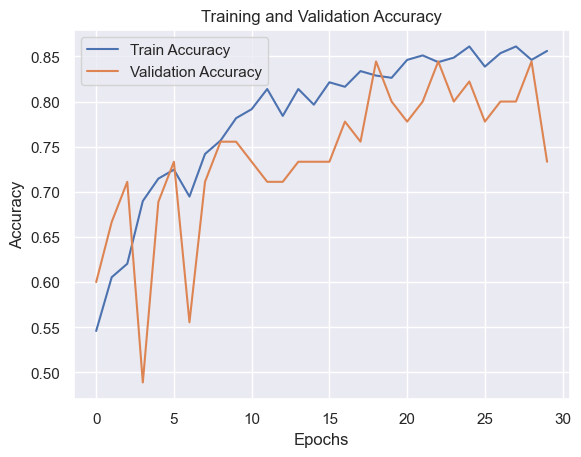

In [6]:
epochs = 30
py_model.fit(train_loader, val_loader, epochs)
py_model.plot_training_and_validation_accuracy()
plt.show()


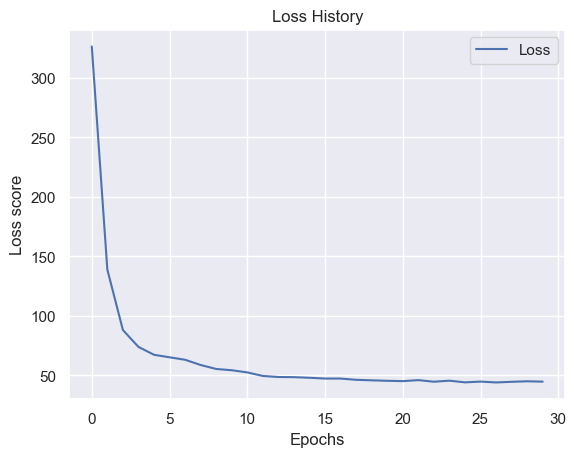

In [7]:
py_model.plot_loss()
plt.show()


In [8]:
f1 = py_model.evaluate_on_test_f1(test_loader)
print(f"Test F1 Score: {f1:.4f}")


Test F1 Score: 0.9024


In [9]:
torch.save(py_model.model.state_dict(), "./experiments/weights/resnet18_melanoma_with_abcd_swin.pth")
print("✅ Модель сохранена!")

✅ Модель сохранена!
